In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/concertiric.csv')

In [5]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


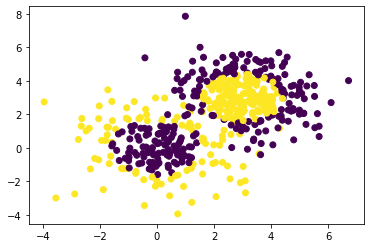

In [6]:
plt.scatter(df['X'],df['Y'],c = df['class'])

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [9]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential
from tensorflow.keras.layers import BatchNormalization


In [10]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [12]:
history1 = model.fit(X,y,epochs = 200, validation_split = 0.20)

Epoch 1/200
13/13 [==============================] - 2s 22ms/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6933 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5175 - val_loss: 0.6936 - val_accuracy: 0.4300
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6936 - val_accuracy: 0.4300
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6938 - val_accuracy: 0.4300
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5175 - val_loss: 0.6940 - val_accuracy: 0.4300
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5175 - val_loss: 0.6942 - val_accuracy: 0.4300
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5175 - val_loss: 0.6944 - val_accuracy: 0.4300
Epoch 8/200


In [13]:
# from the above result we observe that accuracy and validation accuracy is very less

In [15]:
model = Sequential()

model.add(Dense(3,activation = 'relu',input_dim = 2))
model.add(BatchNormalization())   # add the batchNormalize layer 
model.add(Dense(2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))  # batch normalization not add at last end node

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization_1 (Batc  (None, 3)                12        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_2 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40
Trainable params: 30
Non-trainable pa

In [16]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [17]:
history2 = model.fit(X,y,epochs = 200,validation_split = 0.20)

Epoch 1/200
13/13 [==============================] - 2s 26ms/step - loss: 0.7353 - accuracy: 0.4450 - val_loss: 0.7521 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7304 - accuracy: 0.4750 - val_loss: 0.7320 - val_accuracy: 0.5500
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7256 - accuracy: 0.4625 - val_loss: 0.7153 - val_accuracy: 0.5300
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7156 - accuracy: 0.4725 - val_loss: 0.7013 - val_accuracy: 0.5100
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7194 - accuracy: 0.4750 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7105 - accuracy: 0.4875 - val_loss: 0.6834 - val_accuracy: 0.4800
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.7097 - accuracy: 0.4800 - val_loss: 0.6766 - val_accuracy: 0.4600
Epoch 8/200


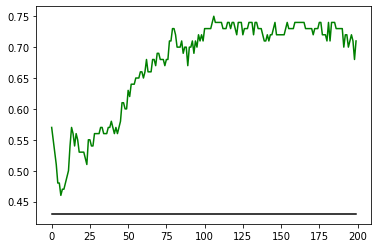

In [18]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

In [19]:
# as shown that validation (green color line)